<a href="https://colab.research.google.com/github/kassymkhan0101/project_3/blob/master/Project_3_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The application of Convolutional Neural Network to facial emotion recognition.
##Written by Kassymkhan Tengel.


##Introduction

The aim of this project is to use a neural network to find out the facial emotion of a person by photo. We concentrate only on 3 emotions: joy, sadness and neutral facial expression. To train, we used about 2000 animated photos, and to validate we used about 1000 photos. However we could not achieve the desired accuracy, we created a sustainable model that is able to recognize basic emotions. Moreover, we used tilting of an image, rotating it, etc. to avoid overfitting and to find best accuracy used different values for steps per epoch, and different rotational values in image generation, etc.

#Related Work

Before starting our project, we read several articles. One day, we stop by article written by Abhijeet Kumar. He named his article as “Demonstration of Facial Emotion Recognition on Real Time Video Using CNN: Python & Keras”. His task was to recognise different emotions of people and classify them. To do so, he used the dataset available on kaggle. In his dataset there were seven different emotions such as 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral. Each image in his dataset had size 48x48 and contained face focused in the centre. The algorithm/model he used can be seen in the figure below. Similarly, we have the almost similar model. Several convolutions, MaxPoolings and ending up with softmax activation. He runned his code by using keras as we did. While testing on real images, his model gave neutral results when face did not express significant emotions.


![alt text](https://i0.wp.com/appliedmachinelearning.blog/wp-content/uploads/2018/11/mini_exception_cnn_model.png?zoom=1.25&resize=489%2C686&ssl=1)
[1]

## Data

To begin we gained access to a database consisting of animated pictures of 6 different emotions(only 3 were used). All the pictures were generated such that they correspond to 7 different characters. The dataset was too big to use since colab is slow even on GPU. Therefore, we randomly chose photos to decrease the number of photos for training and validation. Moreover, we used 5 characters' pictures to train and the other 2 characters' pictures to validate. As further research showed, since generated pictures were similar and animated, model experience difficulties in reading emotions from real human photos. This can be explained by the fact that different emotions can be read from the same photo. As an example, we tried to check what emotion would be read by the model from a picture with a afraid facial expression. As we’ve expected, an afraid person can be recognized as a sad person(since their mouths are open but they are not smiling, etc. )


#Methods

First of all, we imported the dataset from Google drive. Then, divided it into 2 parts: training and validation. Each part contained images of 3 classes (emotions): joy, neutral and sad. The next step was the construction of the model by using the Keras of TensorFlow. In construction of the model, we gave a shape of 256x256 (since each image in our dataset has 256x256 shape) to input data. Our model has 11 layers. The first four odd-numbered layers were Conv2D layers followed by even-numbered MaxPooling2D layers. Convolution layers have ReLu activation functions. Because ReLu helps to train faster without significant changes to the accuracy. Also this magic activation functions handles the gradient problem, where in different cases gradient decreases exponentially.
After Convolutions and MaxPoolings, our model ends up with Flatten and Dense layers. The last layer uses the softmax activation. Because, it is a rule to use softmax in the last layer. It helps us convert our results from previous layers into numbers that humans understand. The next reason is when our model is multi-class we use softmax.
After constructing a model, we compile it with following properties: loss='categorical_crossentropy',
optimizer=RMSprop(lr=1e-4) and   metrics=['acc'] where lr- is a learning rate and acc is an accuracy.


###Downloading dataset and Creating a model

In [0]:
from google.colab import drive
drive.mount('/content/drive')
  
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

  

base_dir = '/content/drive/My Drive/Datasett'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

sad=os.path.join(train_dir,'sad')
joy=os.path.join(train_dir,'joy')
neutral=os.path.join(train_dir,'neutral')


val_sad=os.path.join(validation_dir,'sad')
val_joy=os.path.join(validation_dir,'joy')
val_neutral=os.path.join(validation_dir,'neutral')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(256, 256),  
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(256,256),
        batch_size=20,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=105, 
      epochs=15,
      validation_data=validation_generator,
      validation_steps=46, 
      verbose=1)



It is noticable that we faced overfitting since we have 1.00 accuracy for training. To see how our model behaving we can plot accuracy of both training and validation.

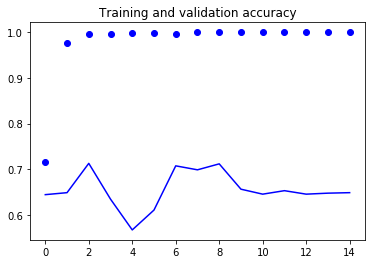

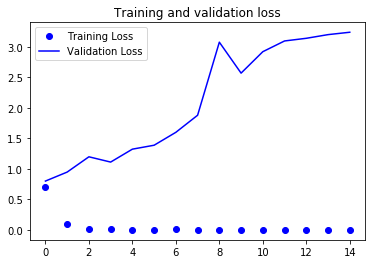

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

To avoid overfitting we tried to tilt and rotate training data a bit. This way we got rid of overfitting, but on the other hand validation accuracy also decreased.

In [0]:

  
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator



base_dir = '/content/drive/My Drive/Datasett'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

sad=os.path.join(train_dir,'sad')
joy=os.path.join(train_dir,'joy')
neutral=os.path.join(train_dir,'neutral')


val_sad=os.path.join(validation_dir,'sad')
val_joy=os.path.join(validation_dir,'joy')
val_neutral=os.path.join(validation_dir,'neutral')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(256, 256),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=40,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50, 
      epochs=25,
      validation_data=validation_generator,
      validation_steps=46, 
      verbose=1)

Found 2116 images belonging to 3 classes.
Found 923 images belonging to 3 classes.
Epoch 1/25
50/50 [==============================] - 31s 617ms/step - loss: 1.1041 - acc: 0.3410 - val_loss: 1.1048 - val_acc: 0.3039
Epoch 2/25
50/50 [==============================] - 26s 512ms/step - loss: 1.0981 - acc: 0.3564 - val_loss: 1.0920 - val_acc: 0.3034
Epoch 3/25
50/50 [==============================] - 29s 573ms/step - loss: 1.0842 - acc: 0.4010 - val_loss: 1.0963 - val_acc: 0.3023
Epoch 4/25
50/50 [==============================] - 27s 531ms/step - loss: 1.0719 - acc: 0.4157 - val_loss: 1.0356 - val_acc: 0.5241
Epoch 5/25
50/50 [==============================] - 26s 529ms/step - loss: 1.0579 - acc: 0.4280 - val_loss: 1.0248 - val_acc: 0.4309
Epoch 6/25
50/50 [==============================] - 26s 526ms/step - loss: 1.0434 - acc: 0.4608 - val_loss: 1.0620 - val_acc: 0.3622
Epoch 7/25
50/50 [==============================] - 26s 524ms/step - loss: 1.0103 - acc: 0.4940 - val_loss: 1.0259 - va

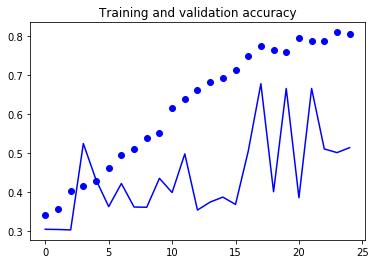

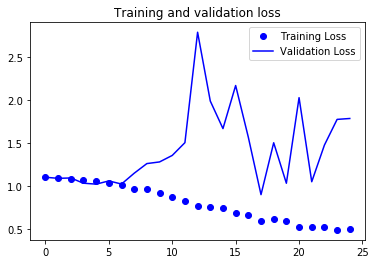

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(256,256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
 
  print(classes)

#Conclusion

To conclude, the model performed surprisingly well for outside photos, even though it had only about 50 percent accuracy. However, the main problem is real photos with complicated facial expressions. We tried to check photos of ourselves, but the model met difficulties trying to understand our emotions. This can be resolved in several ways:
Increasing the number of classes(e.g. Recognized facial expressions)
Using bigger dataset and using python directly instead of colab
Using a training dataset with real photos
Using datasets with a background or providing the model with the ability to get rid of background


#References




1.   Abhijeet Kumar.November 28, 2018  Computer Vision. "*Demonstration of Facial Emotion Recognition on Real Time Video Using CNN : Python & Keras"*Retrieved from
https://appliedmachinelearning.blog/2018/11/28/demonstration-of-facial-emotion-recognition-on-real-time-video-using-cnn-python-keras/
2.   Deepali Aneja, Alex Colburn, Gary Faigin, Linda G. Shapiro, Barbara Mones, "Modeling Stylized Character Expressions via Deep Learning."
Asian Conference on Computer Vision. Springer International Publishing, 2016.


